Found 4996 images belonging to 20 classes.
Found 585 images belonging to 20 classes.
Found 1250 images belonging to 20 classes.
Epoch 1/15
157/157 [==============================] - 236s 1s/step - loss: 1.3127 - accuracy: 0.6169 - val_loss: 0.8281 - val_accuracy: 0.7408
Epoch 2/15
157/157 [==============================] - 207s 1s/step - loss: 0.6569 - accuracy: 0.8026 - val_loss: 0.7333 - val_accuracy: 0.7768
Epoch 3/15
157/157 [==============================] - 223s 1s/step - loss: 0.5081 - accuracy: 0.8421 - val_loss: 0.6183 - val_accuracy: 0.8088
Epoch 4/15
157/157 [==============================] - 237s 2s/step - loss: 0.4128 - accuracy: 0.8719 - val_loss: 0.6292 - val_accuracy: 0.8168
Epoch 5/15
157/157 [==============================] - 234s 1s/step - loss: 0.3774 - accuracy: 0.8809 - val_loss: 0.6718 - val_accuracy: 0.8008
Epoch 6/15
157/157 [==============================] - 278s 2s/step - loss: 0.3355 - accuracy: 0.8915 - val_loss: 0.6339 - val_accuracy: 0.8200
Epoch 7/15
157

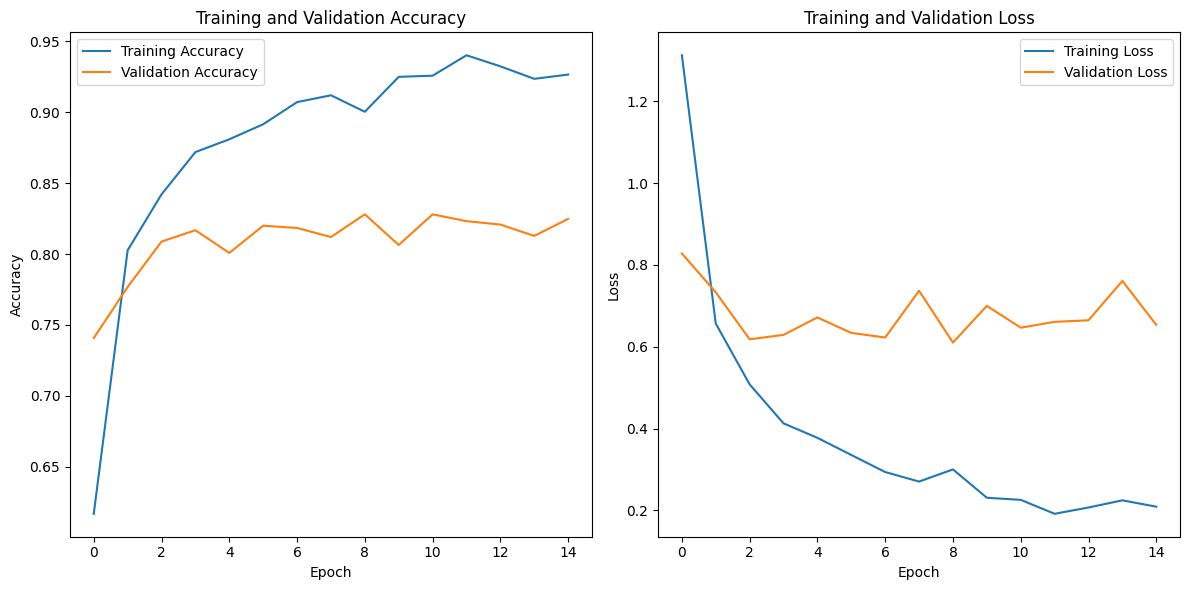

c:\Users\udith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 13s 698ms/step - loss: 0.9696 - accuracy: 0.7607
Test Loss: 0.9696343541145325
Test Accuracy: 0.7606837749481201
157/157 [==============================] - 164s 1s/step - loss: 0.1263 - accuracy: 0.9552
Training Loss: 0.12626217305660248
Training Accuracy: 0.9551641345024109
19/19 [==============================] - 15s 782ms/step - loss: 0.9696 - accuracy: 0.7607
Test Loss: 0.9696343541145325
Test Accuracy: 0.7606837749481201
19/19 [==============================] - 15s 713ms/step
Test F1 Score: 0.06440839598675831


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

train_path = 'augtrain'
test_path = 'dataset/test'
val_path = 'dataset/val'

img_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
np.save('class_aug.npy', train_generator.class_indices)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # Number of classes


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('food_augment.h5')

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import accuracy_score, f1_score

# Load the saved model
loaded_model = tf.keras.models.load_model('food_augment.h5')

# Evaluate the model on the training set
train_loss, train_accuracy = loaded_model.evaluate(train_generator, steps=len(train_generator))
print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_accuracy}')

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions on the test set
test_predictions = loaded_model.predict(test_generator, steps=len(test_generator))

# Convert predictions to class labels
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
true_labels = test_generator.classes

# Calculate F1 score
test_f1_score = f1_score(true_labels, test_pred_labels, average='weighted')
print(f'Test F1 Score: {test_f1_score}')



19/19 [==============================] - 13s 698ms/step


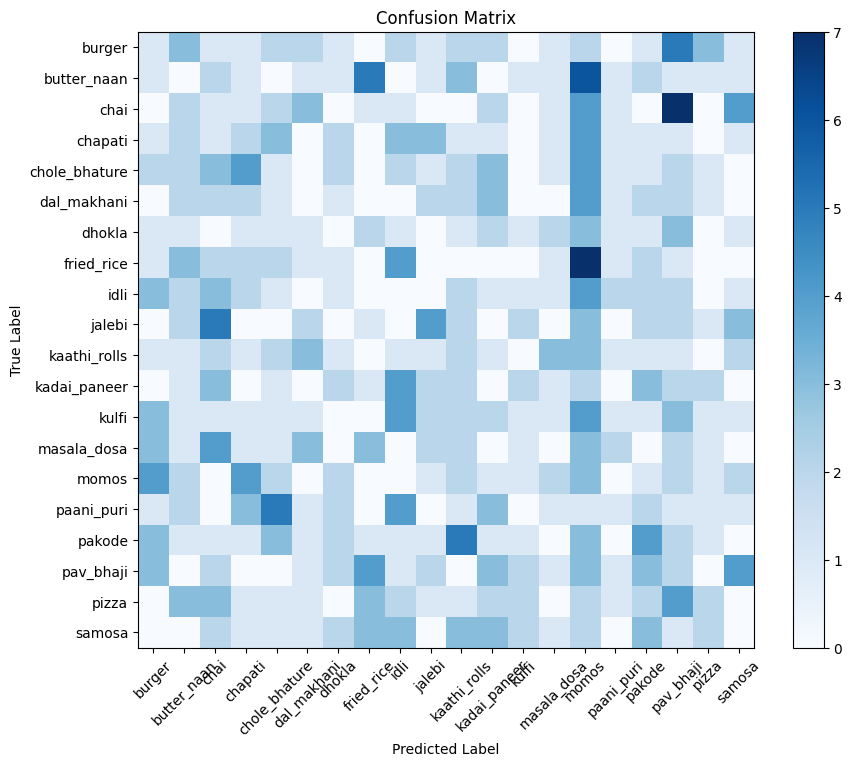

               precision    recall  f1-score   support

       burger       0.04      0.03      0.03        31
  butter_naan       0.00      0.00      0.00        29
         chai       0.03      0.03      0.03        30
      chapati       0.07      0.07      0.07        28
chole_bhature       0.03      0.03      0.03        32
  dal_makhani       0.00      0.00      0.00        25
       dhokla       0.00      0.00      0.00        23
   fried_rice       0.00      0.00      0.00        28
         idli       0.00      0.00      0.00        28
       jalebi       0.17      0.14      0.15        29
 kaathi_rolls       0.06      0.07      0.06        27
 kadai_paneer       0.00      0.00      0.00        28
        kulfi       0.06      0.03      0.04        31
  masala_dosa       0.00      0.00      0.00        29
        momos       0.04      0.10      0.06        30
   paani_puri       0.06      0.03      0.04        30
       pakode       0.12      0.12      0.12        32
    pav_b

In [33]:

from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
class_labels = list(train_generator.class_indices.keys())
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
model = tf.keras.models.load_model('food_augment.h5')
class_labels = list(np.load('class_aug.npy', allow_pickle=True).item().keys())
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    print(f'Predicted class: {predicted_class} - {class_labels[predicted_class]}')
    return class_labels[predicted_class]
new_image_path = 'butt.jpg'
pred_food=predict_image(new_image_path)





1/1 [==============================] - 4s 4s/step
Predicted class: 1 - butter_naan


In [7]:
import csv
gender="male"
age=21
height=160
weight=40
activity_level= "low"
medical_conditions="diabetes"
#User inputs
# gender = input("Gender: ")  
# age = int(input("Age: "))
# height = float(input("Height (cm): "))  
# weight = float(input("Weight (kg): "))
# activity_level = input("Activity level: ")
# medical_conditions = input("Medical conditions: ")

activity_factors = {"sedentary":1.2, "moderate": 1.5, "active": 1.75, "low":1.2}
if gender == "male":
  bmr = 10*weight + 6.25*height - 5*age + 5
else:   
  bmr = 10*weight + 6.25*height - 5*age - 161 
activity_factor = activity_factors[activity_level]

total_calories = activity_factor * bmr  

print("BMR ",bmr)
print(f"Total Calorie You Need: {total_calories:.0f} calories")
import csv
with open('food.csv', 'r', encoding='utf') as file:
   reader = csv.reader(file)
   food_data = list(reader)  
food_item = pred_food
print(food_item)
for item in food_data:
   if item[0].lower() == food_item.lower(): 
     protein = float(item[4])
     carbs = float(item[2])
     fats = float(item[3])
     gi = float(item[1])   
     total_macros = protein + carbs + fats  
     calories = protein*4 + carbs*4 + fats*9
     protein_ratio = protein / total_macros
     carb_ratio = carbs / total_macros    
     print(f"\n{food_item.upper()}")
     print(f"\n{calories:.0f} calories")
     print(f"\n{carbs:.0f}g of carbohydrates") 
     print(f"\n{fats:.0f}g of fat") 
     print(f"\n{protein:.0f}g of protein ({protein_ratio*100:.0f}%)")  
     print(gi)
     conditions = ["diabetes", "PCOS", "thyroid disorders", "anemia", "IBD"]

     if medical_conditions.lower() in conditions:
        if gi > 55 and (medical_conditions.lower() == "diabetes" or medical_conditions.lower() == "PCOS") :
            # print("dia",gi)
            with open('food.csv', 'r', encoding='utf-8') as file:
              reader = csv.DictReader(file)
              for row in reader:
                  food_name = row['\ufefffood']
                  # print(food_name)
                  glycemic_index = float(row['glycemic index'])
                  if glycemic_index < 55 and glycemic_index > 0:
                      # Extract additional details if needed
                      protein = float(row['protein'])
                      carbs = float(row['carbohydrates'])
                      fats = float(row['fat'])
                      
                   
                      print(f"\nFood: {food_name}")
                      print(f"Glycemic Index: {glycemic_index}")
                      print(f"Protein: {protein}g")
                      print(f"Carbohydrates: {carbs}g")
                      print(f"Fats: {fats}g")
            
        if medical_conditions.lower() == "PCOS": 
            print("Choose anti-inflammatory foods high in magnesium")
            
        if medical_conditions.lower() == "thyroid disorders":
            print("Ensure adequate iodine intake from seafood, eggs, dairy")
            
        if medical_conditions.lower() == "anemia":
            print("Increase iron-rich foods like red meat, lentils")   
            
        if medical_conditions.lower() == "IBD":
            print("Avoid trigger foods causing gastrointestinal issues")
            
     else:
        print("No specialized recommendations based on conditions")
   
     print("Analysis tailored to your conditions!")
        
     if weight/height**2 > 25:  
        if carb_ratio > 0.45:
           print(f"Consider lower carb option for weight management")
  



BMR  1300.0
Total Calorie You Need: 1560 calories
butter_naan

BUTTER_NAAN

175 calories

22g of carbohydrates

7g of fat

6g of protein (17%)
71.0

Food: dal_makhani
Glycemic Index: 37.0
Protein: 20.0g
Carbohydrates: 32.0g
Fats: 15.0g

Food: dhokla
Glycemic Index: 34.0
Protein: 3.0g
Carbohydrates: 13.0g
Fats: 5.0g

Food: idli
Glycemic Index: 50.0
Protein: 2.0g
Carbohydrates: 10.0g
Fats: 1.0g

Food: kadai_paneer
Glycemic Index: 50.0
Protein: 17.0g
Carbohydrates: 12.0g
Fats: 20.0g
Analysis tailored to your conditions!


In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv('food.csv')
columns_of_interest = ['protein', 'fat', 'carbohydrates', 'glycemic index']
features = df[columns_of_interest]
pizza_index = df.index[df['food'] == food_item].tolist()[0]

# Get the glycemic index of the pizza item
pizza_glycemic_index = df['glycemic index'].iloc[pizza_index]
glycemic_threshold = pizza_glycemic_index  
cosine_sim_to_pizza = cosine_similarity([features.iloc[pizza_index]], features)
top_5_similar_indices = cosine_sim_to_pizza.argsort()[0][-4:-1][::-1]
top_5_similar_food_names = df['food'].iloc[top_5_similar_indices]
top_5_similar_glycemic_values = df['glycemic index'].iloc[top_5_similar_indices]
print(top_5_similar_food_names)
print(f"Alternatives to {food_item} with lower glycemic index:")
f=0
for food_name, glycemic_value in zip(top_5_similar_food_names.values, top_5_similar_glycemic_values.values):
    if glycemic_value < glycemic_threshold:
        print(f"{food_name} with glycemic index: {glycemic_value}")
        f=1
if f==0:
    print(f"There is no food that is similar to {food_name} with GI less than 55")


10     kaathi_rolls
14            momos
4     chole_bhature
Name: food, dtype: object
Alternatives to burger with lower glycemic index:
kaathi_rolls with glycemic index: 60
momos with glycemic index: 63
